# Implementing Traditional ML Algorithms

## Setting up the notebook

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP
import os

In [2]:
# Directories for plots and results
plots_dir = "../figures/Traditional_ML_Algo_plots"
results_dir = "../results/Traditional_ML_Algo_results"

os.makedirs(plots_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)
print(f"✅ Directories created or already exist: {plots_dir}, {results_dir}")

✅ Directories created or already exist: ../figures/Traditional_ML_Algo_plots, ../results/Traditional_ML_Algo_results


In [3]:
# Set up visualization styles
sns.set(style="whitegrid")
%matplotlib inline

In [4]:
# Plot feature importance
def plot_feature_importance(importances, feature_names, title, save_path):
    """
    Plots feature importance as a bar chart.

    Args:
        importances: Array of feature importances.
        feature_names: List of feature names corresponding to importances.
        title: Title of the plot.
        save_path: Path to save the plot.
    """
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = np.array(feature_names)[sorted_indices]

    plt.figure(figsize=(12, 8))
    plt.bar(sorted_feature_names[:20], sorted_importances[:20], color="skyblue")  # Top 20 features
    plt.xlabel("Features", fontsize=14)
    plt.ylabel("Importance", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()

    # Save and show the plot
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.savefig(save_path, bbox_inches="tight")
    plt.show()
    print(f"✅ Feature importance plot saved at: {save_path}")

### Loading the data

In [5]:
# Load Preprocessed Data
csv_dir = "../data_preparation"
train_df = pd.read_csv(os.path.join(csv_dir, "train_data.csv"))
validation_df = pd.read_csv(os.path.join(csv_dir, "validation_data.csv"))
test_df = pd.read_csv(os.path.join(csv_dir, "test_data.csv"))

# Split Features (X) and Labels (y)
X_train = train_df.iloc[:, 1:].values
y_train = train_df['label'].values
X_validation = validation_df.iloc[:, 1:].values
y_validation = validation_df['label'].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df['label'].values

print("✅ Data loaded successfully!")

✅ Data loaded successfully!


## Applying Dimensionality Reduction

### PCA (Principal Component Analysis) 

In [6]:
print("🔄 Applying PCA...")
pca = PCA(n_components= 137)  # Adjust components based on cumulative explained variance
X_train_pca = pca.fit_transform(X_train)
X_validation_pca = pca.transform(X_validation)
X_test_pca = pca.transform(X_test)

🔄 Applying PCA...


✅ Plot saved at: ../figures/Traditional_ML_Algo_plots/cumulative_explained_variance_pca.png


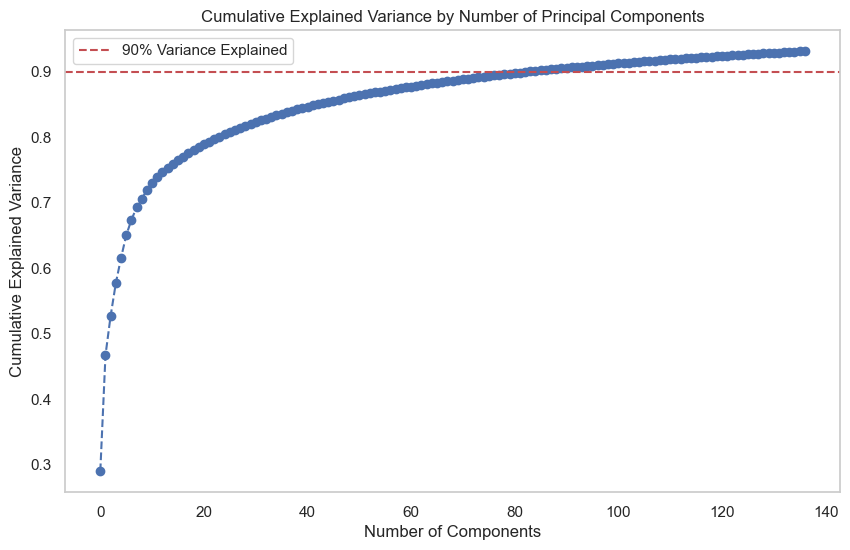

✅ PCA applied. Components needed for 90% variance: 84


In [7]:
# Visualizing Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Explained')
plt.title("Cumulative Explained Variance by Number of Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid()

# Save the plot
plot_path = os.path.join(plots_dir, "cumulative_explained_variance_pca.png")
plt.savefig(plot_path, bbox_inches='tight')
print(f"✅ Plot saved at: {plot_path}")

plt.show()

print(f"✅ PCA applied. Components needed for 90% variance: {np.argmax(cumulative_variance >= 0.9) + 1}")


### t-SNE

In [8]:
print("🔄 Applying t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

🔄 Applying t-SNE...


✅ Plot saved at: ../figures/Traditional_ML_Algo_plots/tsne_scatter_plot.png


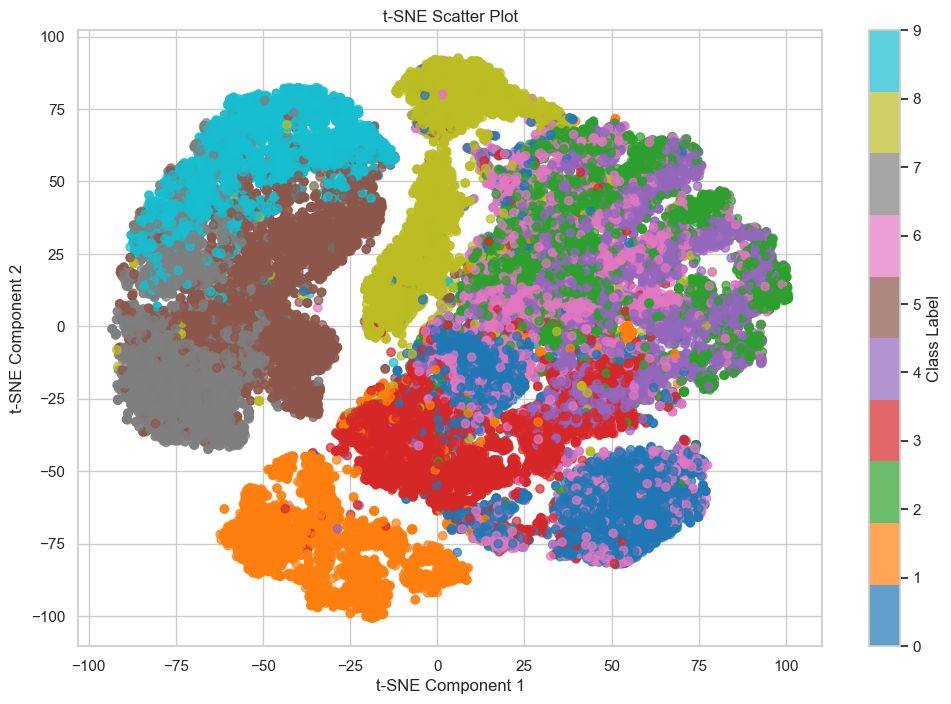

In [9]:
# Visualize t-SNE Results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='tab10', alpha=0.7
)
plt.colorbar(scatter, ticks=range(10), label="Class Label")
plt.title("t-SNE Scatter Plot")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
# Save the plot
plot_path = os.path.join(plots_dir, "tsne_scatter_plot.png")
plt.savefig(plot_path, bbox_inches='tight')
print(f"✅ Plot saved at: {plot_path}")
plt.show()

### UMAP

In [10]:
# UMAP
print("🔄 Applying UMAP...")
umap_reducer = UMAP(n_components=2, random_state=42, n_jobs= -1)
X_train_umap = umap_reducer.fit_transform(X_train)
X_test_umap = umap_reducer.transform(X_test)

print("✅ Dimensionality reduction completed!")

🔄 Applying UMAP...


/Users/satvikpraveen/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


✅ Dimensionality reduction completed!


## Training Traditional ML Models

In [11]:
# Helper Function
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, title="Model"):
    """
    Trains a model and evaluates it using test data.
    Outputs accuracy, classification report, and confusion matrix.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"🔍 {title} Accuracy: {accuracy:.2%}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plot_path = os.path.join(plots_dir, f"{title.replace(' ', '_')}_confusion_matrix.png")
    plt.savefig(plot_path, bbox_inches='tight')
    print(f"✅ Plot saved to {plot_path}")
    plt.show()
    return accuracy

### Training on PCA-Reduced data 

⚙️ Training Random Forest with PCA...
🔍 Random Forest (PCA) Accuracy: 82.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      1000
           1       0.99      0.94      0.96      1000
           2       0.72      0.75      0.73      1000
           3       0.81      0.86      0.83      1000
           4       0.71      0.75      0.73      1000
           5       0.88      0.89      0.88      1000
           6       0.63      0.44      0.52      1000
           7       0.91      0.87      0.89      1000
           8       0.90      0.94      0.92      1000
           9       0.89      0.94      0.91      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Random_Forest_(PCA)_confusion_matrix.png


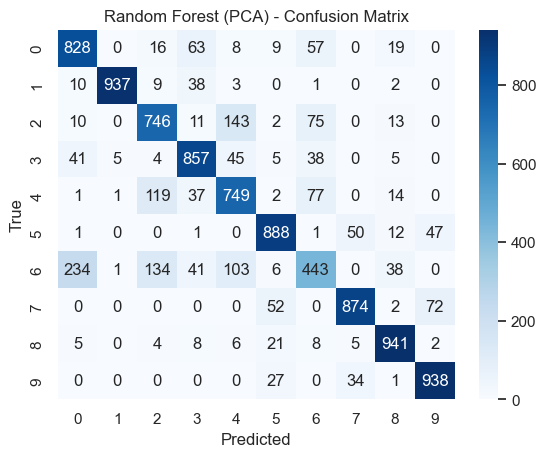

In [12]:
# Random forest
print("⚙️ Training Random Forest with PCA...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_pca_acc = train_and_evaluate_model(rf_model, X_train_pca, y_train, X_test_pca, y_test, "Random Forest (PCA)")

⚙️ Training k-Nearest Neighbors with PCA...
🔍 kNN (PCA) Accuracy: 85.49%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.98      0.97      0.98      1000
           2       0.73      0.80      0.76      1000
           3       0.90      0.87      0.88      1000
           4       0.76      0.75      0.76      1000
           5       0.99      0.88      0.93      1000
           6       0.65      0.58      0.61      1000
           7       0.89      0.95      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.91      0.96      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/kNN_(PCA)_confusion_matrix.png


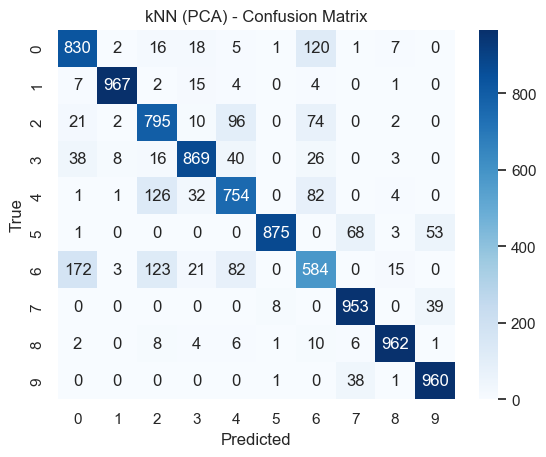

In [13]:
# KNN
print("⚙️ Training k-Nearest Neighbors with PCA...")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_pca_acc = train_and_evaluate_model(knn_model, X_train_pca, y_train, X_test_pca, y_test, "kNN (PCA)")

⚙️ Training XGBoost with PCA...
🔍 XGBoost (PCA) Accuracy: 85.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.77      0.77      1000
           3       0.86      0.88      0.87      1000
           4       0.76      0.80      0.78      1000
           5       0.93      0.91      0.92      1000
           6       0.67      0.58      0.62      1000
           7       0.91      0.93      0.92      1000
           8       0.94      0.95      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.85      0.86      0.86     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/XGBoost_(PCA)_confusion_matrix.png


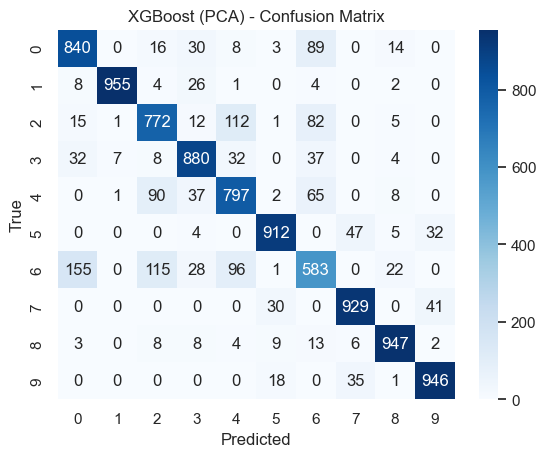

In [14]:
# XGBoost
print("⚙️ Training XGBoost with PCA...")
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_pca_acc = train_and_evaluate_model(xgb_model, X_train_pca, y_train, X_test_pca, y_test, "XGBoost (PCA)")

### Training on t-SNE-Reduced data

⚙️ Training Random Forest with t-SNE...
🔍 Random Forest (t-SNE) Accuracy: 54.34%
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.54      0.53      1000
           1       0.98      0.65      0.78      1000
           2       0.40      0.42      0.41      1000
           3       0.41      0.59      0.49      1000
           4       0.42      0.30      0.35      1000
           5       0.49      0.82      0.61      1000
           6       0.21      0.25      0.23      1000
           7       0.79      0.64      0.71      1000
           8       0.82      0.79      0.80      1000
           9       0.90      0.44      0.59      1000

    accuracy                           0.54     10000
   macro avg       0.60      0.54      0.55     10000
weighted avg       0.60      0.54      0.55     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Random_Forest_(t-SNE)_confusion_matrix.png


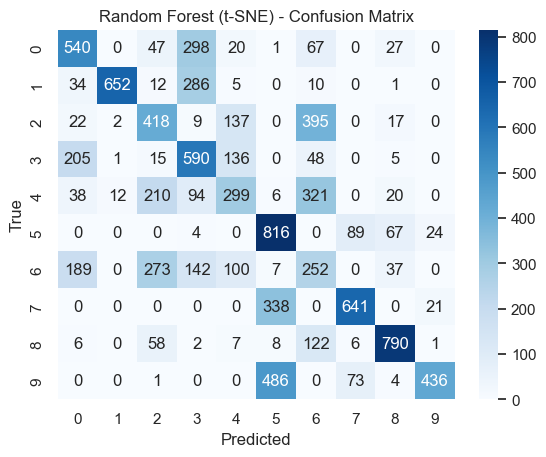

In [15]:
# Random Forest
print("⚙️ Training Random Forest with t-SNE...")
rf_tsne_acc = train_and_evaluate_model(rf_model, X_train_tsne, y_train, X_test_tsne, y_test, "Random Forest (t-SNE)")

⚙️ Training k-Nearest Neighbors with t-SNE...
🔍 kNN (t-SNE) Accuracy: 51.21%
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.50      0.47      1000
           1       0.91      0.64      0.75      1000
           2       0.39      0.37      0.38      1000
           3       0.41      0.55      0.47      1000
           4       0.40      0.35      0.37      1000
           5       0.43      0.74      0.54      1000
           6       0.20      0.21      0.21      1000
           7       0.78      0.56      0.66      1000
           8       0.76      0.77      0.77      1000
           9       0.89      0.42      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.56      0.51      0.52     10000
weighted avg       0.56      0.51      0.52     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/kNN_(t-SNE)_confusion_matrix.png


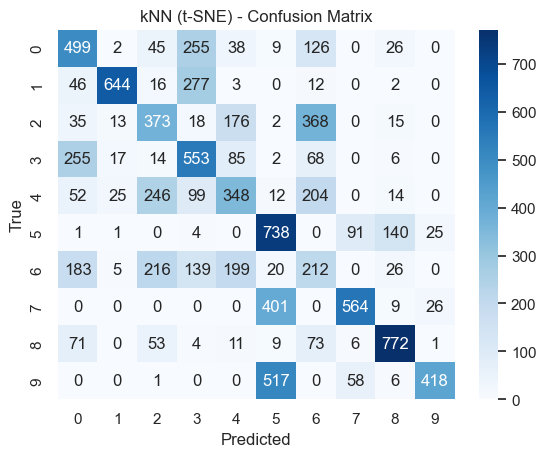

In [16]:
# KNN
print("⚙️ Training k-Nearest Neighbors with t-SNE...")
knn_tsne_acc = train_and_evaluate_model(knn_model, X_train_tsne, y_train, X_test_tsne, y_test, "kNN (t-SNE)")

⚙️ Training XGBoost with t-SNE...
🔍 XGBoost (t-SNE) Accuracy: 55.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      1000
           1       0.97      0.64      0.77      1000
           2       0.41      0.41      0.41      1000
           3       0.43      0.65      0.52      1000
           4       0.43      0.30      0.35      1000
           5       0.49      0.81      0.61      1000
           6       0.24      0.27      0.25      1000
           7       0.79      0.64      0.70      1000
           8       0.81      0.78      0.79      1000
           9       0.90      0.44      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.60      0.55      0.56     10000
weighted avg       0.60      0.55      0.56     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/XGBoost_(t-SNE)_confusion_matrix.png


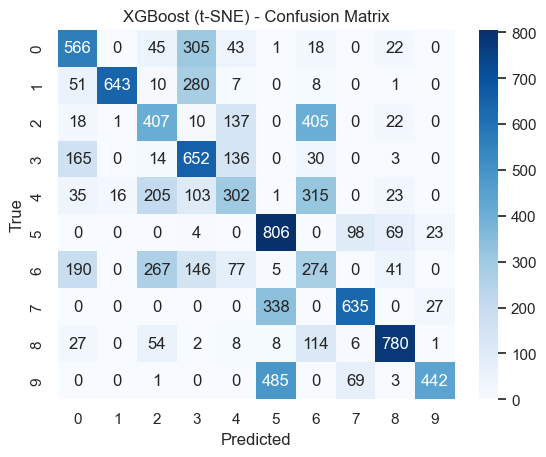

In [17]:
# XGBoost
print("⚙️ Training XGBoost with t-SNE...")
xgb_tsne_acc = train_and_evaluate_model(xgb_model, X_train_tsne, y_train, X_test_tsne, y_test, "XGBoost (t-SNE)")

### Training on UMAP-Reduced Data 

🔍 Random Forest (UMAP) Accuracy: 77.03%
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1000
           1       1.00      0.93      0.96      1000
           2       0.58      0.61      0.59      1000
           3       0.83      0.80      0.82      1000
           4       0.59      0.59      0.59      1000
           5       0.93      0.82      0.87      1000
           6       0.43      0.35      0.39      1000
           7       0.85      0.88      0.86      1000
           8       0.96      0.92      0.94      1000
           9       0.87      0.94      0.91      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Random_Forest_(UMAP)_confusion_matrix.png


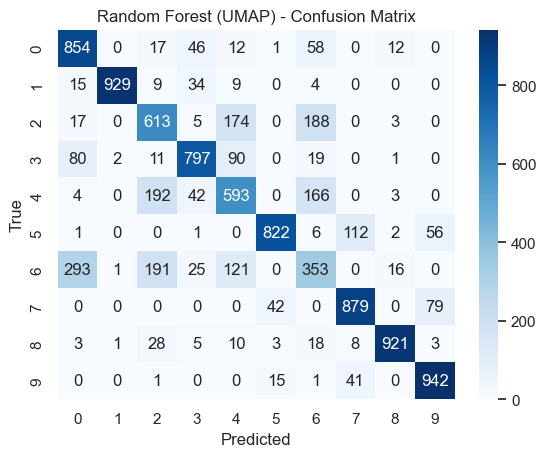

In [18]:
# Random Forest (UMAP)
rf_umap_acc = train_and_evaluate_model(rf_model, X_train_umap, y_train, X_test_umap, y_test, "Random Forest (UMAP)")

🔍 kNN (UMAP) Accuracy: 76.05%
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1000
           1       0.97      0.94      0.96      1000
           2       0.53      0.66      0.58      1000
           3       0.80      0.80      0.80      1000
           4       0.58      0.55      0.57      1000
           5       0.90      0.82      0.86      1000
           6       0.45      0.35      0.40      1000
           7       0.84      0.86      0.85      1000
           8       0.96      0.93      0.94      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/kNN_(UMAP)_confusion_matrix.png


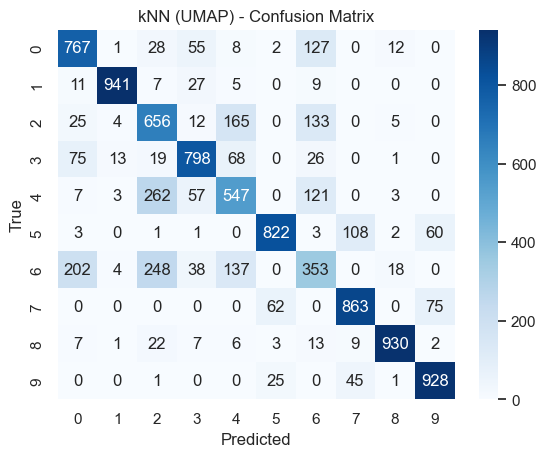

In [19]:
# k-Nearest Neighbors (UMAP)
knn_umap_acc = train_and_evaluate_model(knn_model, X_train_umap, y_train, X_test_umap, y_test, "kNN (UMAP)")

🔍 XGBoost (UMAP) Accuracy: 77.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.99      0.94      0.96      1000
           2       0.60      0.60      0.60      1000
           3       0.82      0.80      0.81      1000
           4       0.57      0.60      0.59      1000
           5       0.93      0.82      0.87      1000
           6       0.45      0.41      0.43      1000
           7       0.84      0.88      0.86      1000
           8       0.96      0.93      0.94      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/XGBoost_(UMAP)_confusion_matrix.png


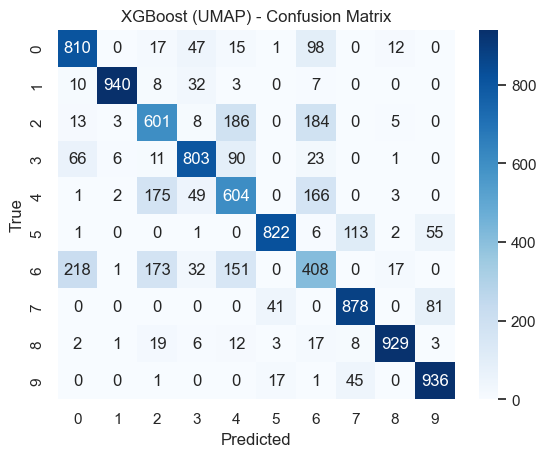

In [20]:
# XGBoost (UMAP)
xgb_umap_acc = train_and_evaluate_model(xgb_model, X_train_umap, y_train, X_test_umap, y_test, "XGBoost (UMAP)")

## Hyperparameter Tuning

In [21]:
print("🔍 Training models with hyperparameter tuning...")

🔍 Training models with hyperparameter tuning...


### Random Forest

🔍 Tuned Random Forest (PCA) Accuracy: 84.57%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.75      0.80      0.77      1000
           3       0.84      0.88      0.86      1000
           4       0.76      0.78      0.77      1000
           5       0.91      0.91      0.91      1000
           6       0.66      0.53      0.59      1000
           7       0.91      0.92      0.91      1000
           8       0.92      0.95      0.93      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_Random_Forest_(PCA)_confusion_matrix.png


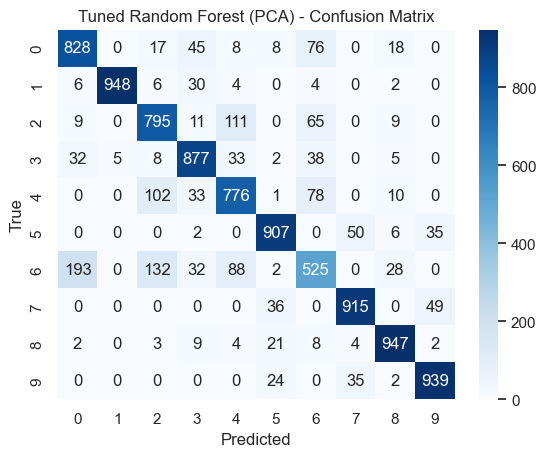

In [22]:
# Random Forest (PCA)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=3)
rf_grid.fit(X_train_pca, y_train)
best_rf = rf_grid.best_estimator_
rf_pca_tuned_acc = train_and_evaluate_model(best_rf, X_train_pca, y_train, X_test_pca, y_test, "Tuned Random Forest (PCA)")

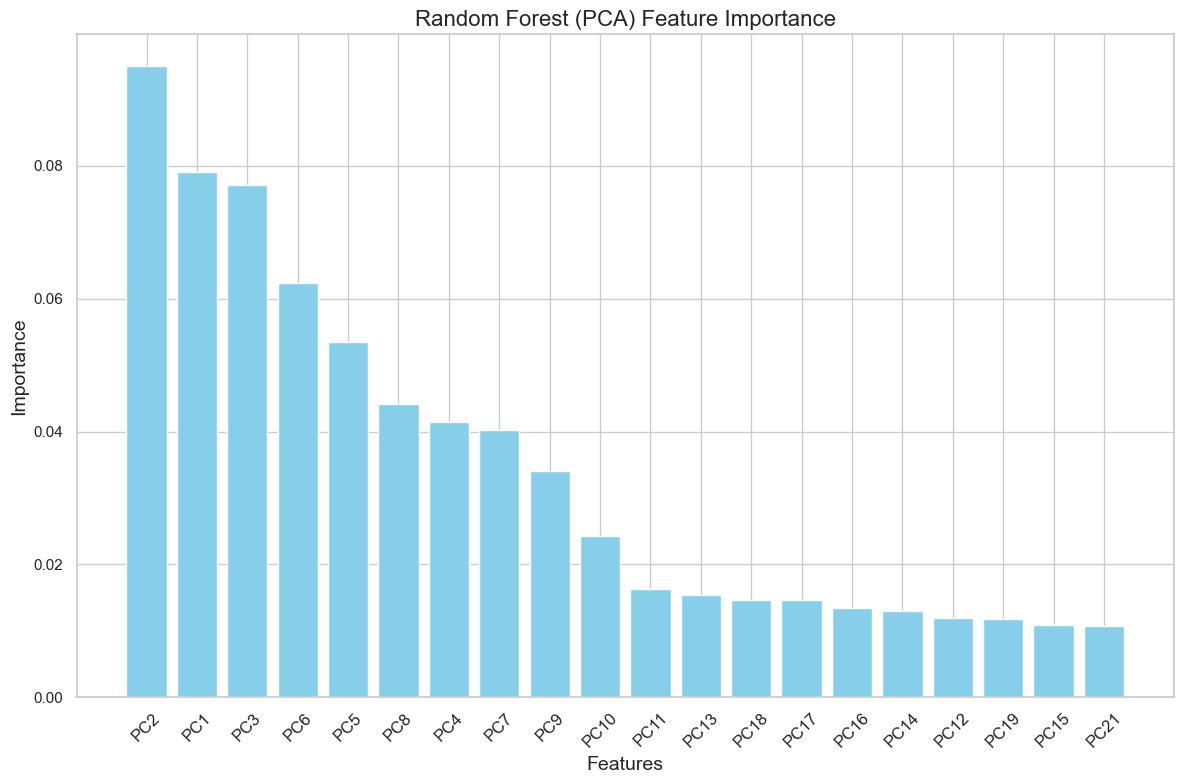

✅ Feature importance plot saved at: ../figures/Traditional_ML_Algo_plots/random_forest_pca_feature_importance.png


In [23]:
feature_importances = best_rf.feature_importances_
feature_names = [f"PC{i + 1}" for i in range(X_train_pca.shape[1])]  # PCA components
plot_path = os.path.join(plots_dir, "random_forest_pca_feature_importance.png")
plot_feature_importance(
    feature_importances,
    feature_names,
    "Random Forest (PCA) Feature Importance",
    plot_path
)

🔍 Tuned Random Forest (t-SNE) Accuracy: 52.87%
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.49      0.48      1000
           1       0.97      0.66      0.79      1000
           2       0.41      0.42      0.41      1000
           3       0.42      0.57      0.48      1000
           4       0.43      0.35      0.39      1000
           5       0.46      0.82      0.59      1000
           6       0.17      0.20      0.19      1000
           7       0.79      0.56      0.66      1000
           8       0.83      0.80      0.81      1000
           9       0.89      0.42      0.57      1000

    accuracy                           0.53     10000
   macro avg       0.58      0.53      0.54     10000
weighted avg       0.58      0.53      0.54     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_Random_Forest_(t-SNE)_confusion_matrix.png


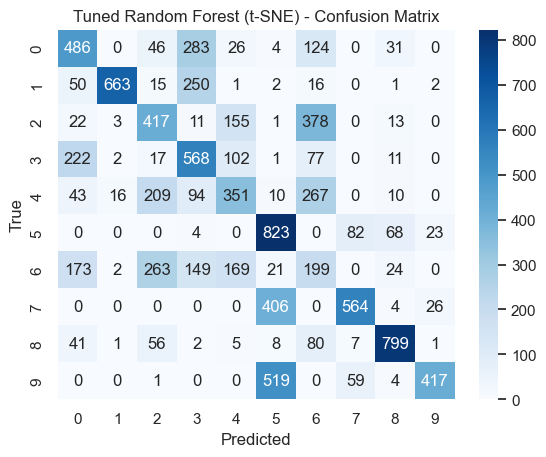

In [24]:
#Random Forest (t-SNE)
rf_tsne_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=3)
rf_tsne_grid.fit(X_train_tsne, y_train)
best_rf_tsne = rf_tsne_grid.best_estimator_
rf_tsne_tuned_acc = train_and_evaluate_model(best_rf_tsne, X_train_tsne, y_train, X_test_tsne, y_test, "Tuned Random Forest (t-SNE)")

🔍 Tuned Random Forest (UMAP) Accuracy: 77.60%
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      1000
           1       0.98      0.94      0.96      1000
           2       0.57      0.64      0.60      1000
           3       0.83      0.80      0.81      1000
           4       0.60      0.59      0.59      1000
           5       0.93      0.82      0.87      1000
           6       0.47      0.43      0.45      1000
           7       0.84      0.87      0.86      1000
           8       0.96      0.93      0.94      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_Random_Forest_(UMAP)_confusion_matrix.png


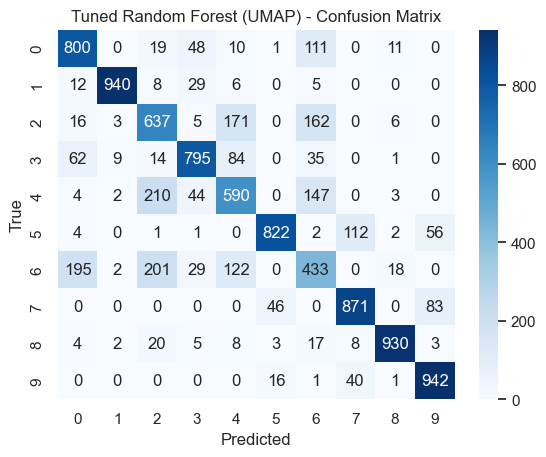

In [25]:
# Random Forest (UMAP)
rf_umap_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, scoring='accuracy', cv=3)
rf_umap_grid.fit(X_train_umap, y_train)
best_rf_umap = rf_umap_grid.best_estimator_
rf_umap_tuned_acc = train_and_evaluate_model(best_rf_umap, X_train_umap, y_train, X_test_umap, y_test, "Tuned Random Forest (UMAP)")

### k-Nearest Neighbors 

🔍 Tuned kNN (PCA) Accuracy: 85.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.74      0.79      0.76      1000
           3       0.90      0.87      0.89      1000
           4       0.75      0.76      0.76      1000
           5       1.00      0.86      0.93      1000
           6       0.67      0.60      0.63      1000
           7       0.88      0.96      0.92      1000
           8       0.97      0.96      0.96      1000
           9       0.91      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_kNN_(PCA)_confusion_matrix.png


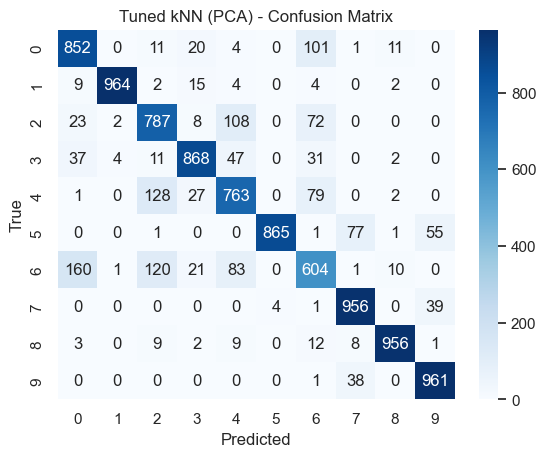

In [26]:
# k-Nearest Neighbors (PCA)
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=3)
knn_grid.fit(X_train_pca, y_train)
best_knn = knn_grid.best_estimator_
knn_pca_tuned_acc = train_and_evaluate_model(best_knn, X_train_pca, y_train, X_test_pca, y_test, "Tuned kNN (PCA)")

🔍 Tuned kNN (t-SNE) Accuracy: 51.42%
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.51      0.47      1000
           1       0.90      0.63      0.74      1000
           2       0.40      0.38      0.39      1000
           3       0.41      0.55      0.47      1000
           4       0.41      0.35      0.38      1000
           5       0.43      0.72      0.54      1000
           6       0.20      0.21      0.20      1000
           7       0.77      0.58      0.66      1000
           8       0.78      0.78      0.78      1000
           9       0.88      0.42      0.57      1000

    accuracy                           0.51     10000
   macro avg       0.56      0.51      0.52     10000
weighted avg       0.56      0.51      0.52     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_kNN_(t-SNE)_confusion_matrix.png


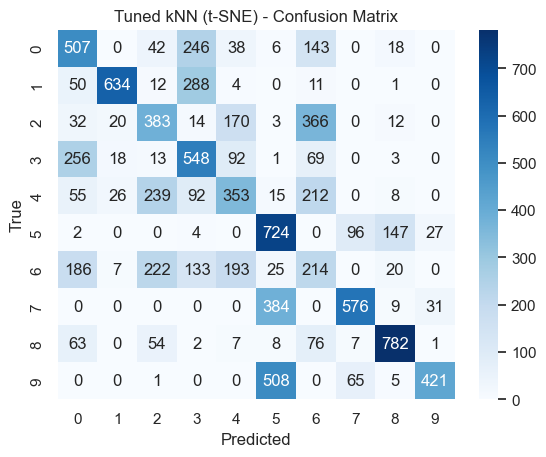

In [27]:
# k-Nearest Neighbors (t-SNE)
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'metric': ['euclidean', 'manhattan']
}
knn_tsne_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=3)
knn_tsne_grid.fit(X_train_tsne, y_train)
best_knn_tsne = knn_tsne_grid.best_estimator_
knn_tsne_tuned_acc = train_and_evaluate_model(best_knn_tsne, X_train_tsne, y_train, X_test_tsne, y_test, "Tuned kNN (t-SNE)")

🔍 Tuned kNN (UMAP) Accuracy: 76.72%
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.97      0.94      0.96      1000
           2       0.55      0.66      0.60      1000
           3       0.81      0.80      0.81      1000
           4       0.60      0.56      0.58      1000
           5       0.92      0.82      0.87      1000
           6       0.46      0.39      0.42      1000
           7       0.84      0.87      0.85      1000
           8       0.96      0.93      0.94      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_kNN_(UMAP)_confusion_matrix.png


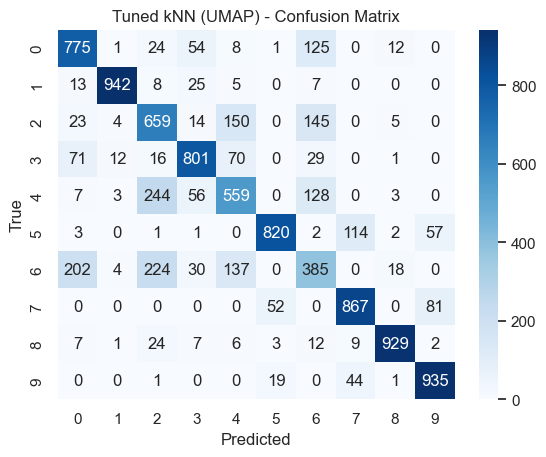

In [28]:
# k-Nearest Neighbors (UMAP)
knn_umap_grid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, scoring='accuracy', cv=3)
knn_umap_grid.fit(X_train_umap, y_train)
best_knn_umap = knn_umap_grid.best_estimator_
knn_umap_tuned_acc = train_and_evaluate_model(best_knn_umap, X_train_umap, y_train, X_test_umap, y_test, "Tuned kNN (UMAP)")

### XGBoost

🔍 Tuned XGBoost (PCA) Accuracy: 85.61%
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.76      0.77      0.77      1000
           3       0.86      0.88      0.87      1000
           4       0.76      0.80      0.78      1000
           5       0.93      0.91      0.92      1000
           6       0.67      0.58      0.62      1000
           7       0.91      0.93      0.92      1000
           8       0.94      0.95      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.85      0.86      0.86     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_XGBoost_(PCA)_confusion_matrix.png


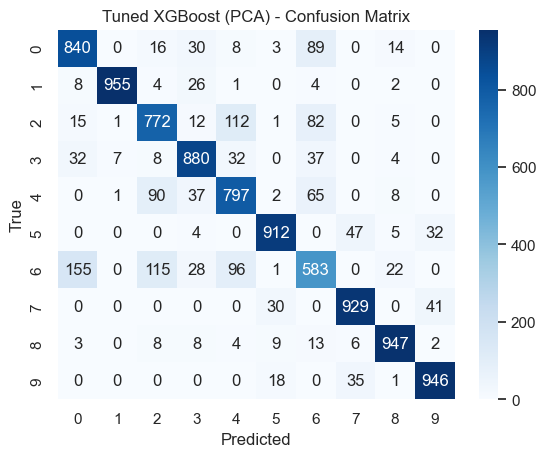

In [29]:
# XGBoost (PCA)
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}
xgb_pca_grid = GridSearchCV(
    XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_grid_xgb,
    scoring='accuracy',
    cv=3
)
xgb_pca_grid.fit(X_train_pca, y_train)
best_xgb = xgb_pca_grid.best_estimator_
xgb_pca_tuned_acc = train_and_evaluate_model(best_xgb, X_train_pca, y_train, X_test_pca, y_test, "Tuned XGBoost (PCA)")

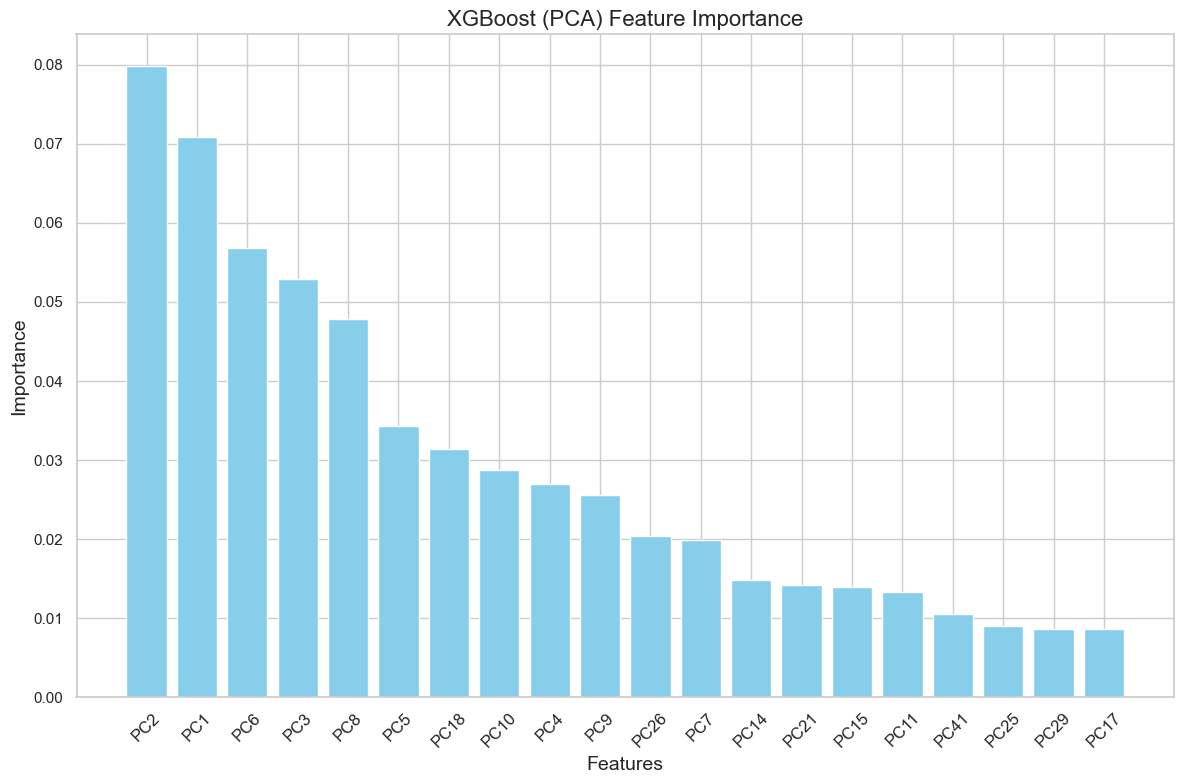

✅ Feature importance plot saved at: ../figures/Traditional_ML_Algo_plots/xgboost_pca_feature_importance.png


In [30]:
# Feature importance for XGBoost (PCA)
feature_importances = best_xgb.feature_importances_
feature_names = [f"PC{i + 1}" for i in range(X_train_pca.shape[1])]  # PCA components
plot_path = os.path.join(plots_dir, "xgboost_pca_feature_importance.png")
plot_feature_importance(
    feature_importances,
    feature_names,
    "XGBoost (PCA) Feature Importance",
    plot_path
)

🔍 Tuned XGBoost (t-SNE) Accuracy: 55.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.57      0.55      1000
           1       0.97      0.64      0.77      1000
           2       0.41      0.41      0.41      1000
           3       0.43      0.65      0.52      1000
           4       0.43      0.30      0.35      1000
           5       0.49      0.81      0.61      1000
           6       0.24      0.27      0.25      1000
           7       0.79      0.64      0.70      1000
           8       0.81      0.78      0.79      1000
           9       0.90      0.44      0.59      1000

    accuracy                           0.55     10000
   macro avg       0.60      0.55      0.56     10000
weighted avg       0.60      0.55      0.56     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_XGBoost_(t-SNE)_confusion_matrix.png


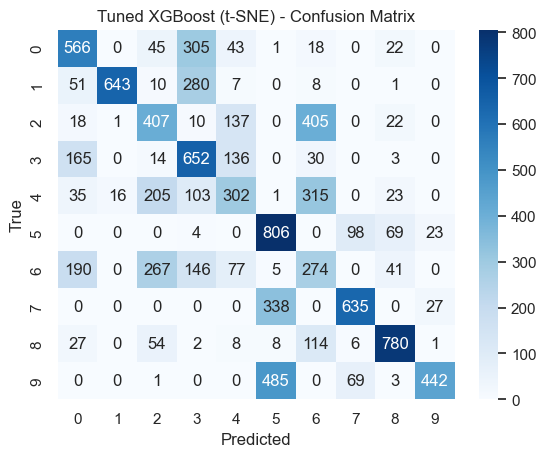

In [31]:
# XGBoost (t-SNE)
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}
xgb_tsne_grid = GridSearchCV(
    XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_grid_xgb,
    scoring='accuracy',
    cv=3
)
xgb_tsne_grid.fit(X_train_tsne, y_train)
best_xgb_tsne = xgb_tsne_grid.best_estimator_
xgb_tsne_tuned_acc = train_and_evaluate_model(best_xgb_tsne, X_train_tsne, y_train, X_test_tsne, y_test, "Tuned XGBoost (t-SNE)")

🔍 Tuned XGBoost (UMAP) Accuracy: 77.31%
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.99      0.94      0.96      1000
           2       0.60      0.60      0.60      1000
           3       0.82      0.80      0.81      1000
           4       0.57      0.60      0.59      1000
           5       0.93      0.82      0.87      1000
           6       0.45      0.41      0.43      1000
           7       0.84      0.88      0.86      1000
           8       0.96      0.93      0.94      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000

✅ Plot saved to ../figures/Traditional_ML_Algo_plots/Tuned_XGBoost_(UMAP)_confusion_matrix.png


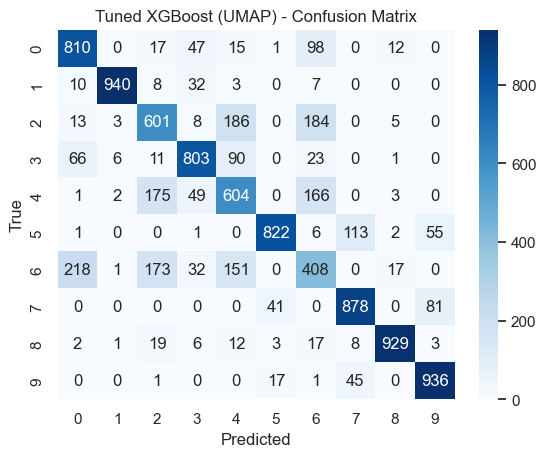

In [32]:
# XGBoost (UMAP)
xgb_umap_grid = GridSearchCV(
    XGBClassifier(eval_metric='mlogloss', random_state=42),
    param_grid_xgb,
    scoring='accuracy',
    cv=3
)
xgb_umap_grid.fit(X_train_umap, y_train)
best_xgb_umap = xgb_umap_grid.best_estimator_
xgb_umap_tuned_acc = train_and_evaluate_model(
    best_xgb_umap, X_train_umap, y_train, X_test_umap, y_test, "Tuned XGBoost (UMAP)"
)

### Results Summary

In [33]:
results = pd.DataFrame({
    "Model": ["Random Forest", "kNN", "XGBoost"],
    "Accuracy (PCA)": [rf_pca_acc, knn_pca_acc, xgb_pca_acc],
    "Accuracy (PCA, Tuned)": [rf_pca_tuned_acc, knn_pca_tuned_acc, xgb_pca_tuned_acc],
    "Accuracy (t-SNE)": [rf_tsne_acc, knn_tsne_acc, xgb_tsne_acc],
    "Accuracy (t-SNE, Tuned)": [rf_tsne_tuned_acc, knn_tsne_tuned_acc, xgb_tsne_tuned_acc],
    "Accuracy (UMAP)": [rf_umap_acc, knn_umap_acc, xgb_umap_acc],
    "Accuracy (UMAP, Tuned)": [rf_umap_tuned_acc, knn_umap_tuned_acc, xgb_umap_tuned_acc]
})
print(results)

           Model  Accuracy (PCA)  Accuracy (PCA, Tuned)  Accuracy (t-SNE)  \
0  Random Forest          0.8201                 0.8457            0.5434   
1            kNN          0.8549                 0.8576            0.5121   
2        XGBoost          0.8561                 0.8561            0.5507   

   Accuracy (t-SNE, Tuned)  Accuracy (UMAP)  Accuracy (UMAP, Tuned)  
0                   0.5287           0.7703                  0.7760  
1                   0.5142           0.7605                  0.7672  
2                   0.5507           0.7731                  0.7731  


### Save results

In [34]:
# Save results
results_path = os.path.join(results_dir, "traditional_ml_results.csv")
results.to_csv(results_path, index=False)
print(f"✅ Results saved to {results_path}")

✅ Results saved to ../results/Traditional_ML_Algo_results/traditional_ml_results.csv
